### This notebook goes over fundamentals of using Python's Pandas package to work with 1 dimensional (1D) datasets. For your first mini-project you will need to be able to load in 1D climate datasets and create effective visualizations of them. Use this lesson as a resource to look back on when you are working on your mini-project.
### These datasets may come in the form of ...
 * #### Comma Seperated Values(CSV) files.
 * #### Data stored in Excel spreadsheets (.xlxs, or .xls prior to Excel 2007)
 * #### Data stored in JavaScript Object Notation (JSON) files
 * #### Text (.txt) files 
 
 
 #### Portions of this notebook are inspired from the [__10 minutes to pandas__ tutorial ](https://pandas.pydata.org/docs/user_guide/10min.html)from pandas.pydata.org:
 __Author__: Dr. Beadling. For any questions regarding the contents of this notebook please contact rebecca.beadling@temple.edu.

### You should be __entering__ this lesson with ...
* Having completely worked through `hello_world.ipynb`, `Fundamentals_ControlFlow_Funtions.ipynb`, and `Intro_to_arrays.ipynb`
* Knowledge of Python fundamentals covered in all of the above notebooks. 
* Knowledge of how to use git status, git commit, git push.

### You should be __leaving__ this lesson with ...
* An understanding of what a Pandas series & DataFrame are.
* An understanding of how to load in specific file types as Pandas DataFrames.
* How to carry out basic calculations across a DataFrame.
* How to produce a __very basic__ plot from your data (plot customization via Matplotlib is the topic of the next lesson)

In [95]:
import pandas as pd                          
import matplotlib.pyplot as plt 
import numpy as np

In [96]:
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  

### Pandas has two types of data structures:
* #### __Series__: 1D labeled array holding data of any type.
* #### __DataFrame__: 2D data structure that holds data like a Table with rows or columns (think of an Excel spreadsheet).

### For the purpose of this course, you just need to understand how to use Pandas to load in and manipulate Series & DataFrames that contain information regarding climate.

### Load a CSV files that contain measurements of atmospheric CO2 concentrations as Pandas DataFrames:
* Monthly atmospheric CO2 concentrations as measured from the Mauna Loa Observatory, Hawaii from 1958 to 2023 (https://keelingcurve.ucsd.edu/)
* Monthly atmospheric CO2 concentrations from a global network of CO2 measurements (NOAA's Global Monitoring Laboratory) from 1979 to 2023 (https://gml.noaa.gov/ccgg/trends/global.html?doi=10.15138/9n0h-zh07)
* Monthly atmospheric CO2 concentrations from the World Data Centre for Greenhouse Gases (WDCGG) operated by the Japan Meteorological Agency (https://gaw.kishou.go.jp/)

In [97]:
CO2_MaunaLoa = pd.read_csv('./data/greenhouse_gases/CO2_MaunaLoa_TimeSeries.csv',parse_dates=['Date'])
CO2_NOAA = pd.read_csv('./data/greenhouse_gases/CO2_NOAA_TimeSeries.csv',parse_dates=['Date'])
CO2_WDCGG = pd.read_csv('./data/greenhouse_gases/CO2_WDCGG_TimeSeries.csv',parse_dates=['Date'])

In [98]:
CO2_MaunaLoa

,Date,Mauna Loa CO2 (ppm),Mauna Loa CO2 uncertainty
0,1958-03-01,315.70,NaN
1,1958-04-01,317.45,NaN
2,1958-05-01,317.51,NaN
3,1958-06-01,317.24,NaN
4,1958-07-01,315.86,NaN
...,...,...,...
776,2022-11-01,417.51,NaN
777,2022-12-01,418.95,NaN
778,2023-01-01,419.47,NaN
779,2023-02-01,420.41,NaN


### For the purpose of learning, we will just work with one of these datasets to start. Writing the name of the DataFrame and executing the cell below reveals the structure of the DataFrame:
* #### We see that the CO2_MaunaLoa DataFram was 781 rows and 3 columns.
* #### We see that the labels of the columns of the DataFrame has the values:
    __`Date`__, __`Mauna Loa CO2 (ppm)`__, and __`Mauna Loa CO2 uncertainty`__.
* #### We also see that executing the cell with just the DataFrames name by default returns the first 5 rows and the last 5 rows.
* #### You can also see that the values within each column are indexed such that the first value is value 0 [left hand column]

In [99]:
CO2_MaunaLoa

,Date,Mauna Loa CO2 (ppm),Mauna Loa CO2 uncertainty
0,1958-03-01,315.70,NaN
1,1958-04-01,317.45,NaN
2,1958-05-01,317.51,NaN
3,1958-06-01,317.24,NaN
4,1958-07-01,315.86,NaN
...,...,...,...
776,2022-11-01,417.51,NaN
777,2022-12-01,418.95,NaN
778,2023-01-01,419.47,NaN
779,2023-02-01,420.41,NaN


### The first few columns of the DataFrame are referred to as the __head__ and the last few rows are referred to as the __tail__. If we want, we can specify that we want to see a certain number of rows using the `.head()` and `.tail()` methods:

In [100]:
CO2_MaunaLoa.head(0) 

,Date,Mauna Loa CO2 (ppm),Mauna Loa CO2 uncertainty


In [101]:
CO2_MaunaLoa.head(10)

,Date,Mauna Loa CO2 (ppm),Mauna Loa CO2 uncertainty
0,1958-03-01,315.70,NaN
1,1958-04-01,317.45,NaN
2,1958-05-01,317.51,NaN
3,1958-06-01,317.24,NaN
4,1958-07-01,315.86,NaN
5,1958-08-01,314.93,NaN
6,1958-09-01,313.20,NaN
7,1958-10-01,312.43,NaN
8,1958-11-01,313.33,NaN
9,1958-12-01,314.67,NaN


### <span style="color:red">  In the cell below, write code that displays the last row and the last 5 rows using the .tail() method:

### The DataFrames object has a method called info(), that gives you more information about the data set. Here we can see that this DataFrame is composed of 3 distinct columns named 'Date', 'Mauna Loa CO2', and 'Mauna Loa CO2 uncertainty', with Data Types of datetime64, float64, float64. There  RangeIndex tells us there are 781 rows from 0 to 780 spanning 3 columns. 

### The Non-Null Count tells us that the column named 'Mauna Loa CO2 uncertainty' has 781 values that are NaN values. We can ignore this for now as we won't be using this data. However there may be situatons where you want to "clean" your datasets and remove NaN values. If you find yourself in this situation .... follow this tutorial: https://www.w3schools.com/python/pandas/pandas_cleaning.asp.

In [102]:
CO2_MaunaLoa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       781 non-null    datetime64[ns]
 1   Mauna Loa CO2 (ppm)        781 non-null    float64       
 2   Mauna Loa CO2 uncertainty  0 non-null      float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 18.4 KB


### Let's look at the structure of our array again and use our knowledge of indexing to figure out how we could extract specfic values / rows / columns. If you have a really large dataset / spreadsheet, you may have __lots__ of columns ..... but you likely only want to plot or analyze a few:

### The column on the far left of our DataFrame shows the index label associated with each row. In Pandas, we can access data using the `.loc ` method and specify an __index label__. <span style="color:red"> How would we return the values for March 1958 ?

In [103]:
CO2_MaunaLoa.head(10)

,Date,Mauna Loa CO2 (ppm),Mauna Loa CO2 uncertainty
0,1958-03-01,315.70,NaN
1,1958-04-01,317.45,NaN
2,1958-05-01,317.51,NaN
3,1958-06-01,317.24,NaN
4,1958-07-01,315.86,NaN
5,1958-08-01,314.93,NaN
6,1958-09-01,313.20,NaN
7,1958-10-01,312.43,NaN
8,1958-11-01,313.33,NaN
9,1958-12-01,314.67,NaN


### Executing the cell below shows us the values for first row of our DataFrame, which contains the CO2 concentration in ppm for March 1958:

In [104]:
CO2_MaunaLoa.loc[0]

Date                         1958-03-01 00:00:00
Mauna Loa CO2 (ppm)                        315.7
Mauna Loa CO2 uncertainty                    NaN
Name: 0, dtype: object

### <span style="color:red"> How would we return the last value, for March 2023 ?

### We can specify a list of index labels to return using `.loc`. The code below will return the values of the first two rows of the DataFrame:

In [105]:
CO2_MaunaLoa.loc[[1,2]]

,Date,Mauna Loa CO2 (ppm),Mauna Loa CO2 uncertainty
1,1958-04-01,317.45,NaN
2,1958-05-01,317.51,NaN


### The `.loc` method is locating based off of index label, so we could give it any list of lables to return. The code below returns row 7, 8, 100, and 700:

In [106]:
CO2_MaunaLoa.loc[[7,8,100,700]]

,Date,Mauna Loa CO2 (ppm),Mauna Loa CO2 uncertainty
7,1958-10-01,312.43,NaN
8,1958-11-01,313.33,NaN
100,1966-07-01,322.38,NaN
700,2016-07-01,404.59,NaN


### OK, so we now know how to access data within specific rows ... but what about if we want to isolate a specific column? Say we only care about the Mauna Loa CO2 (ppm) data ...

### As we saw earlier, each column has a specific __label__, which is a `string` data type:
* __`Date`__, __`Mauna Loa CO2 (ppm)`__, and __`Mauna Loa CO2 uncertainty`__.

### We can use this label information to specify which columns to extract, using the syntax of `DataFrame_Name['column label']` as shown below. You see when this cell is executed, that we no longer have information regarding year, month, etc ...

In [107]:
CO2_MaunaLoa["Mauna Loa CO2 (ppm)"]

0      315.70
1      317.45
2      317.51
3      317.24
4      315.86
        ...  
776    417.51
777    418.95
778    419.47
779    420.41
780    421.00
Name: Mauna Loa CO2 (ppm), Length: 781, dtype: float64

### <span style="color:red"> How would we extract the column with information regarding the Date? Write code in the cell below that does this.

### Our columns within a DataFrame are a __Series__ .... which can be further indexed to extract specific values associated with their index label: 
### To extract the first and last value of atmospheric CO2 concentrations:

In [108]:
CO2_MaunaLoa["Mauna Loa CO2 (ppm)"][0]

315.7

In [109]:
CO2_MaunaLoa["Mauna Loa CO2 (ppm)"][780]

421.0

### Let's create a new variable called CO2_ppm and set it equal to the CO2 concentrations from our Pandas DataFrame and perform some calculations on it:

In [110]:
CO2_ppm = CO2_MaunaLoa["Mauna Loa CO2 (ppm)"]
CO2_ppm

0      315.70
1      317.45
2      317.51
3      317.24
4      315.86
        ...  
776    417.51
777    418.95
778    419.47
779    420.41
780    421.00
Name: Mauna Loa CO2 (ppm), Length: 781, dtype: float64

### Because Pandas is __built on NumPy__, it also has some built in methods for basic calcuations. We can compute the mean, median, mode, max, min, and standard deviation across our Series using the `.mean()`, `.median()`, `.mode()` , `.max()`, `.min()`, and `.std()` methods:

### There are a large number of methods you can apply to Pandas Series & DataFrames, a full list can be found here for further study: https://pandas.pydata.org/docs/reference/frame.html

In [111]:
CO2_ppm.mean()

357.98245838668373

In [112]:
CO2_ppm.median()

354.23

In [113]:
CO2_ppm.mode()

0    336.14
Name: Mauna Loa CO2 (ppm), dtype: float64

In [114]:
CO2_ppm.max()

421.0

In [115]:
CO2_ppm.min()

312.43

In [116]:
CO2_ppm.std()

30.79659819458706

### If you need to take advantage of the sophisticated (and high performance) computing of NumPy, we can easily read in any dataset as a DataFrame and convert a Pandas Series to a NumPy array:

In [117]:
CO2_ppm_np = np.array(CO2_ppm)
type(CO2_ppm_np)

numpy.ndarray

In [118]:
CO2_ppm_np.ndim

1

In [119]:
CO2_ppm_np.shape

(781,)

In [120]:
CO2_ppm_np

array([315.7 , 317.45, 317.51, 317.24, 315.86, 314.93, 313.2 , 312.43,
       313.33, 314.67, 315.58, 316.48, 316.65, 317.72, 318.29, 318.15,
       316.54, 314.8 , 313.84, 313.33, 314.81, 315.58, 316.43, 316.98,
       317.58, 319.03, 320.04, 319.59, 318.18, 315.9 , 314.17, 313.83,
       315.  , 316.19, 316.89, 317.7 , 318.54, 319.48, 320.58, 319.77,
       318.57, 316.79, 314.99, 315.31, 316.1 , 317.01, 317.94, 318.55,
       319.68, 320.57, 321.02, 320.62, 319.61, 317.4 , 316.25, 315.42,
       316.69, 317.7 , 318.74, 319.07, 319.86, 321.38, 322.25, 321.48,
       319.74, 317.77, 316.21, 315.99, 317.07, 318.35, 319.57, 320.01,
       320.74, 321.84, 322.26, 321.89, 320.44, 318.69, 316.7 , 316.87,
       317.68, 318.71, 319.44, 320.44, 320.89, 322.14, 322.17, 321.87,
       321.21, 318.87, 317.81, 317.3 , 318.87, 319.42, 320.62, 321.6 ,
       322.39, 323.7 , 324.08, 323.75, 322.38, 320.36, 318.64, 318.1 ,
       319.78, 321.03, 322.33, 322.5 , 323.04, 324.42, 325.  , 324.09,
      

In [121]:
CO2_year = np.array(CO2_MaunaLoa["Date"])
CO2_year

array(['1958-03-01T00:00:00.000000000', '1958-04-01T00:00:00.000000000',
       '1958-05-01T00:00:00.000000000', '1958-06-01T00:00:00.000000000',
       '1958-07-01T00:00:00.000000000', '1958-08-01T00:00:00.000000000',
       '1958-09-01T00:00:00.000000000', '1958-10-01T00:00:00.000000000',
       '1958-11-01T00:00:00.000000000', '1958-12-01T00:00:00.000000000',
       '1959-01-01T00:00:00.000000000', '1959-02-01T00:00:00.000000000',
       '1959-03-01T00:00:00.000000000', '1959-04-01T00:00:00.000000000',
       '1959-05-01T00:00:00.000000000', '1959-06-01T00:00:00.000000000',
       '1959-07-01T00:00:00.000000000', '1959-08-01T00:00:00.000000000',
       '1959-09-01T00:00:00.000000000', '1959-10-01T00:00:00.000000000',
       '1959-11-01T00:00:00.000000000', '1959-12-01T00:00:00.000000000',
       '1960-01-01T00:00:00.000000000', '1960-02-01T00:00:00.000000000',
       '1960-03-01T00:00:00.000000000', '1960-04-01T00:00:00.000000000',
       '1960-05-01T00:00:00.000000000', '1960-06-01

### We can create a 2 dimensional NumPy array that is a __timeseries__ of CO2 using Pandas' `.to_numpy()` method:

In [122]:
CO2_timeseries = CO2_MaunaLoa[["Date","Mauna Loa CO2 (ppm)"]].to_numpy()

In [123]:
CO2_timeseries

array([[Timestamp('1958-03-01 00:00:00'), 315.7],
       [Timestamp('1958-04-01 00:00:00'), 317.45],
       [Timestamp('1958-05-01 00:00:00'), 317.51],
       ...,
       [Timestamp('2023-01-01 00:00:00'), 419.47],
       [Timestamp('2023-02-01 00:00:00'), 420.41],
       [Timestamp('2023-03-01 00:00:00'), 421.0]], dtype=object)

### We could have also used this method above when we created a 1D array:

In [124]:
CO2_ppm_np = CO2_MaunaLoa["Mauna Loa CO2 (ppm)"].to_numpy()

### Now we can use Pyplot, a submodule of the Matplotlib library to visualize the data, specifying the x and y axes that correspond to the Columns in our Pandas DataFrame.

<Axes: xlabel='Date'>

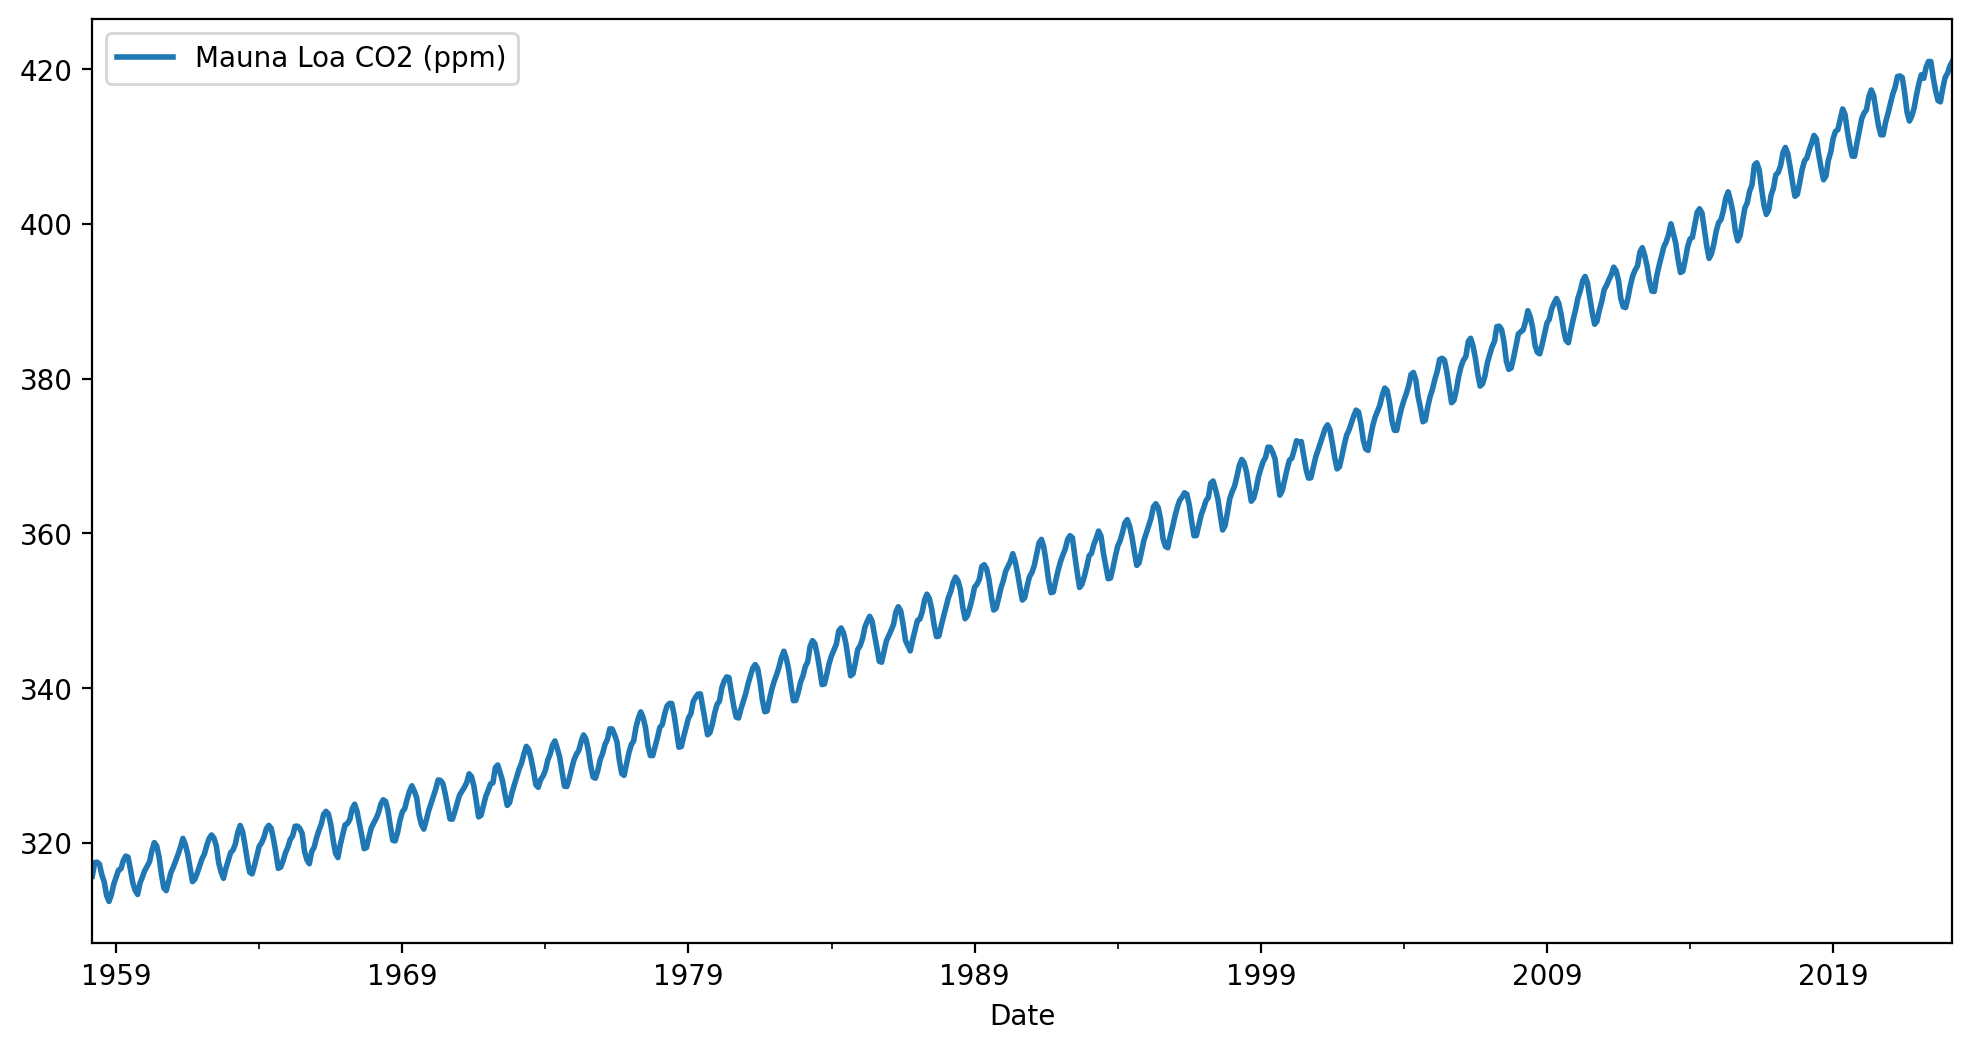

In [125]:
CO2_MaunaLoa.plot(x='Date',
            y='Mauna Loa CO2 (ppm)',
            linewidth=2)

### Or we can use matplotlib pyplot and specify the x, y as follows:

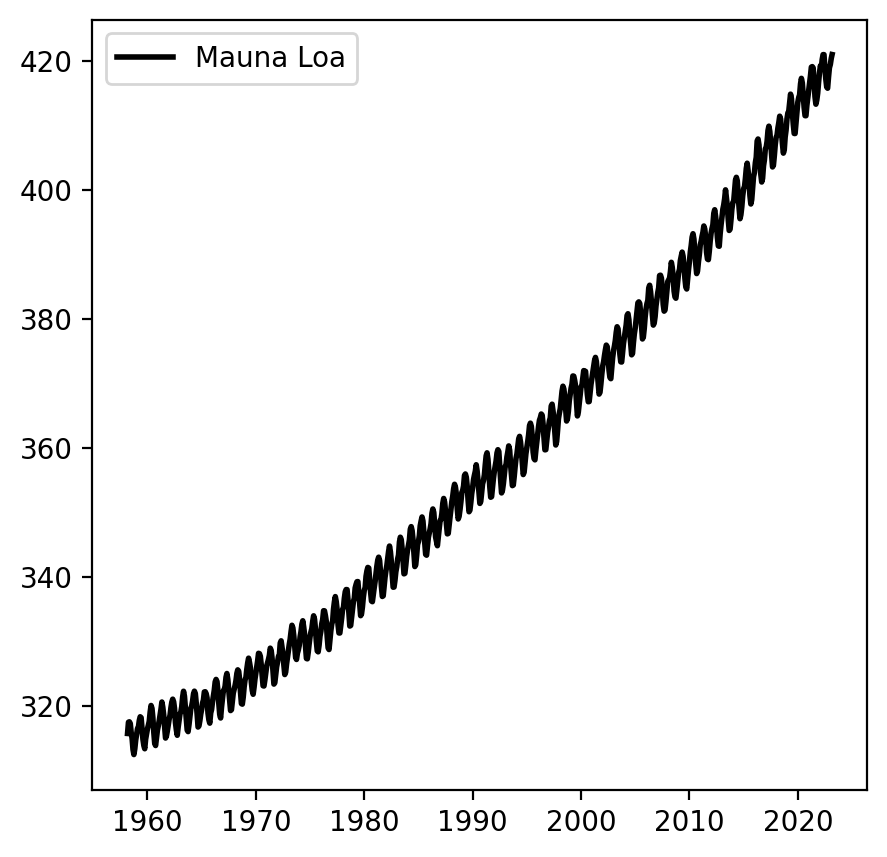

In [126]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(CO2_MaunaLoa['Date'],
         CO2_MaunaLoa['Mauna Loa CO2 (ppm)'],
         linewidth=2,label='Mauna Loa',
         color='black')

## plot a legend on the ax
plt.legend()

### What if we wanted to customize this more? This is just a small flavor of what we can do, your next lesson focuses on developing your plotting and plot customization skills!

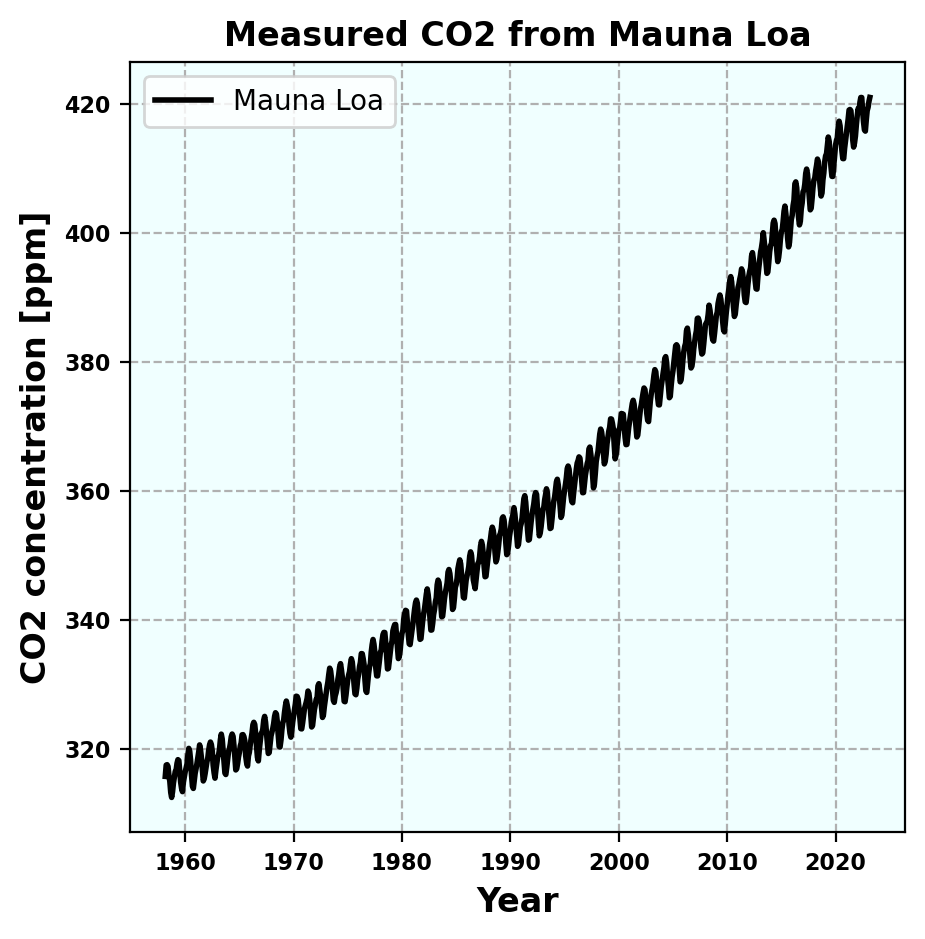

In [127]:
## Create your figure and axis objects using the subplots() 
## function from pyplot (which you imported using the alias plt):

fig, ax = plt.subplots(figsize=(5,5))

ax.plot(CO2_MaunaLoa['Date'],
         CO2_MaunaLoa['Mauna Loa CO2 (ppm)'],
         linewidth=2,label='Mauna Loa',
         color='black')

## Set properties of title, ylabels and xlabels
ax.set_title('Measured CO2 from Mauna Loa',
             fontsize=12, fontweight='bold')
ax.set_ylabel('CO2 concentration [ppm]',
             fontsize=12, fontweight='bold')
ax.set_xlabel('Year',
             fontsize=12, fontweight='bold')

plt.legend() ## Add legend, with label corresponding the label you set in the plt.plot() above.
plt.grid(linestyle='--') ## Add dashed grid lines

### adjust ticklabel font properties:
for tick in ax.get_xticklabels():
    tick.set_fontsize(8)
    tick.set_fontweight("bold")
for tick in ax.get_yticklabels():
    tick.set_fontsize(8)
    tick.set_fontweight("bold")
    
## Change background color
# Setting the background color of the plot
# using set_facecolor() method

ax.set_facecolor("azure")

### This lesson so far has focused on reading in and working with datasets that are stored as .csv files, but what if you have a dataset that is an Excel spreadsheet or a .txt file (like the .txt you just created in the arrays lesson!) ??? We will be working exclusively with .csv files for our 1D climate datasets, however you may wish to use the code below as a reference if you are using other datasets in your own research.

### The code below reads in an __Excel (.xlxs, .xls)__ file as a Pandas DataFrame. In the most basic use-case, read_excel takes a path to an Excel file, and the sheet_name (if there are multiple sheets) indicating which sheet to parse.

#### `# Returns a DataFrame`
#### `pd.read_excel("path_to_file.xls", sheet_name="Sheet1")`

### We won't be working with Excel files in this class

### The code below reads in a text file (.txt) as a Pandas DataFrame. In this case we also use `pd.read_csv` however we indicate the the separator is a single space ('') for the space character because, for text files, the space character will seperate each field.

#### `# read text file into pandas DataFrame`
#### `df = pd.read_csv("gfg.txt", sep=" ")`

### Now that you know how to open up and work with files that contain 1D arrays, our next task will be becoming familiar with customizing plots using Matplotlib! But first .... your task is to use the remainder of the class to complete the following assignment:

### <span style="color:red"> Complete the following:
* #### <span style="color:red"> Create a NEW notebook and rename it: CO2_TimeSeries_Analysis
* #### <span style="color:red"> Read in all three CO2 datasets: NOAA, WDCGG, and Mauna Loa
* #### <span style="color:red"> Create three seperate plots of time series of CO2 concentration in ppm.
* #### <span style="color:red"> Create a single plot with _all_ three datasets on the plot, make each time series a seperate color and with a legend on the plot (hint .... you can use the fig, ax = plt.subplots(figsize=(5,5)) method for this ... one plot will plot on top of the other).
* #### <span style="color:red"> In the cell below your image ... create a Figure caption using Markdown.
* #### <span style="color:red"> The first cell of your notebook should contain descriptive Markdown that describes the purpose of the notebook and the author including contact information.    
* #### <span style="color:red"> Push this notebook and your new notebook to your GitHub repository.

### Shutting down your notebook (__don't do this yet!!__ These are just instructions for when class is over).
### Before shutting down, save your notebook with the disc icon in the Notebook toolbar. Go to the the File menu and click Shut Down to close the browser table and Jupyter Lab itself.